# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
url_train = 'https://raw.githubusercontent.com/subhashdixit/Support_Vector_Machines/main/SVC/Census_Income_Classification/adult_data.csv'
url_test = 'https://raw.githubusercontent.com/subhashdixit/Support_Vector_Machines/main/SVC/Census_Income_Classification/adult_test.csv'
df_train = pd.read_csv(url_train,header=None)
df_test = pd.read_csv(url_test,header=None,skiprows=1)

In [3]:
# Merging the train and test data to perform EDA
df = pd.concat([df_train,df_test])

In [4]:
df.shape

(48842, 15)

In [5]:
# Taking sample of the dataset
df = df.sample(n = 20000)

In [6]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [7]:
# Renaming the columns as per the description

rename_columns = {0:'age',1:'workclass',2:'fnlwgt',
                 3:'education',4:'education-num',5:'marital-status',6:'occupation',7:'relationship',8:'race',9:'sex',10:'capital-gain',11:'capital-loss',12:'hours-per-week',
                 13:'native-country',14:'class'}
df.rename(columns=rename_columns, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 10766 to 16294
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             20000 non-null  int64 
 1   workclass       20000 non-null  object
 2   fnlwgt          20000 non-null  int64 
 3   education       20000 non-null  object
 4   education-num   20000 non-null  int64 
 5   marital-status  20000 non-null  object
 6   occupation      20000 non-null  object
 7   relationship    20000 non-null  object
 8   race            20000 non-null  object
 9   sex             20000 non-null  object
 10  capital-gain    20000 non-null  int64 
 11  capital-loss    20000 non-null  int64 
 12  hours-per-week  20000 non-null  int64 
 13  native-country  20000 non-null  object
 14  class           20000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.4+ MB


In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [10]:
# Check unique values in each columns

for i in df.columns:
    print("-"*80)
    print(f"{i} : {df[i].unique()}")
    print("-"*80)

--------------------------------------------------------------------------------
age : [34 55 54 53 45 43 64 33 35 58 36 22 41 40 19 39 42 46 25 30 47 21 31 56
 23 28 20 37 17 27 44 24 57 61 32 51 26 29 50 52 59 18 67 90 38 48 60 62
 65 74 76 49 63 73 68 77 66 71 75 69 70 81 72 79 82 80 84 88 78 85 83 87]
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
workclass : [' Private' ' Self-emp-inc' ' Local-gov' ' Self-emp-not-inc'
 ' Federal-gov' ' ?' ' State-gov' ' Without-pay' ' Never-worked']
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
fnlwgt : [203488 194436 420691 ... 109199 152953 205256]
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
education :

In [11]:
# Preview dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
10766,34,Private,203488,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
8831,55,Private,194436,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,<=50K.
29413,54,Private,420691,1st-4th,2,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Mexico,<=50K
25628,53,Self-emp-inc,188067,Some-college,10,Widowed,Sales,Unmarried,White,Female,0,0,40,United-States,<=50K
31249,34,Private,347166,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [12]:
# shape of the dataset
print('Rows : {} \ncolumns : {}'.format(df.shape[0], df.shape[1]))

Rows : 20000 
columns : 15


In [13]:
# Features data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 10766 to 16294
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             20000 non-null  int64 
 1   workclass       20000 non-null  object
 2   fnlwgt          20000 non-null  int64 
 3   education       20000 non-null  object
 4   education-num   20000 non-null  int64 
 5   marital-status  20000 non-null  object
 6   occupation      20000 non-null  object
 7   relationship    20000 non-null  object
 8   race            20000 non-null  object
 9   sex             20000 non-null  object
 10  capital-gain    20000 non-null  int64 
 11  capital-loss    20000 non-null  int64 
 12  hours-per-week  20000 non-null  int64 
 13  native-country  20000 non-null  object
 14  class           20000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.4+ MB


In [14]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,20000.0,38.69960,13.745560,17.0,28.00,37.0,48.00,90.0
fnlwgt,20000.0,189528.53400,104934.707487,13492.0,117317.25,178419.0,238615.25,1490400.0
education-num,20000.0,10.07945,2.563741,1.0,9.00,10.0,12.00,16.0
capital-gain,20000.0,1070.51010,7338.981967,0.0,0.00,0.0,0.00,99999.0
capital-loss,20000.0,88.23710,405.575296,0.0,0.00,0.0,0.00,4356.0
hours-per-week,20000.0,40.34870,12.354746,1.0,40.00,40.0,45.00,99.0


# EDA and FE

In [15]:
# Check for null values 

round((df.isnull().sum() / df.shape[0])*100,2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education-num     0.0 %
marital-status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital-gain      0.0 %
capital-loss      0.0 %
hours-per-week    0.0 %
native-country    0.0 %
class             0.0 %
dtype: object

In [16]:
#Replace "."  with blank in the class feature

df['class'] = df['class'].apply(lambda x: x.replace('.',''))

In [17]:
#Remove extra space from the column name

df.columns = df.columns.str.strip()
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [18]:
# Checking the value counts of label categories

income = df['class'].value_counts(normalize=True)
round(income*100,2).astype('str') + ' %'

 <=50K    76.04 %
 >50K     23.96 %
Name: class, dtype: object

In [19]:
# Graphical Analysis

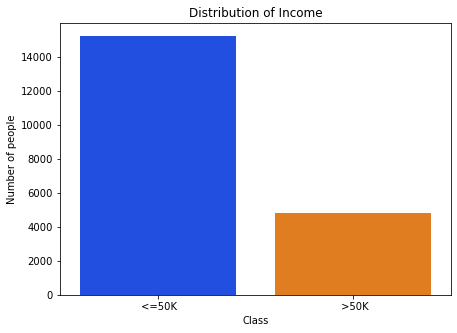

In [20]:
# Creating a barplot for 'Class' feature

income = df['class'].value_counts()

plt.figure(figsize=(7,5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income')
plt.xlabel('Class')
plt.ylabel('Number of people')
plt.show()

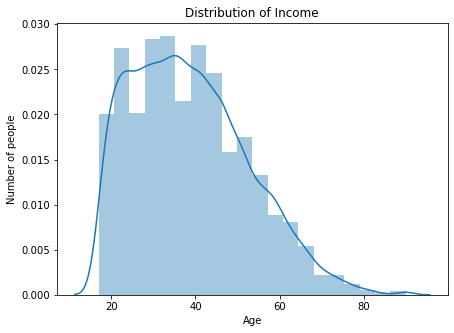

In [21]:
# Creating a distplot for 'Age'

age = df['age'].value_counts()

plt.figure(figsize=(7,5))
sns.distplot(df['age'],bins=20)
plt.title('Distribution of Income')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

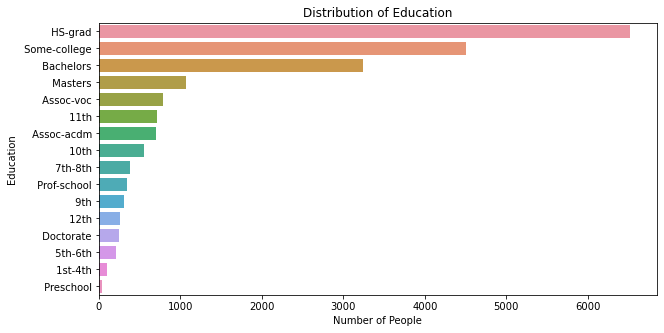

In [22]:
# Creating a barplot for 'Eduaction'
edu = df['education'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=edu.values, y = edu.index)
plt.title('Distribution of Education')
plt.xlabel('Number of People')
plt.ylabel('Education')
plt.show()

In [23]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

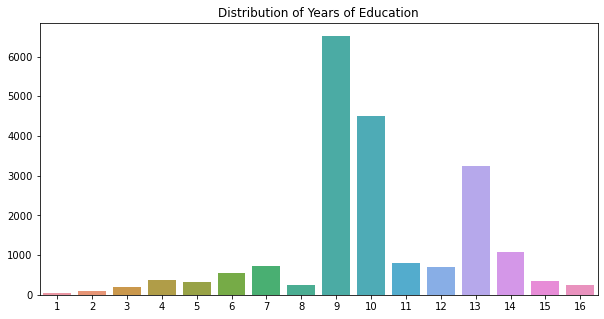

In [24]:
# Creating a barplot for 'Years of Education'
edu_num = df['education-num'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(edu_num.index, edu_num.values)
plt.title('Distribution of Years of Education')
plt.xlabel='Number of people'
plt.ylebel='Years of Education'

In [25]:
df['education-num']

10766    10
8831      5
29413     2
25628    10
31249    10
         ..
30184    10
32295    10
14437    10
13458     4
16294     9
Name: education-num, Length: 20000, dtype: int64

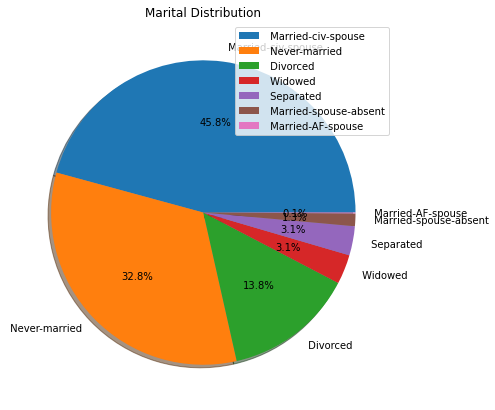

In [26]:
# Creating a pie chart for 'Marital Status'

marital = df['marital-status'].value_counts()

plt.figure(figsize=(10,7))
plt.pie(marital.values, labels=marital.index, shadow=True, autopct='%1.1f%%')
plt.title('Marital Distribution')
plt.legend()
plt.show()

In [27]:
# Remove Extra space from the data

df = df.applymap(lambda x: " ".join(x.split()) if isinstance(x,str) else x)

In [28]:
# Replacing '?' with most mode value
for col in ['workclass','native-country','occupation']:
    frequent_value = df[col].mode()[0]
    df[col] = df[col].replace('?',frequent_value)

In [29]:
# Check whether '?' is present or not in the dataset

df[(df['workclass'] == '?') | (df['native-country'] == '?') | (df['occupation'] == '?')].sum()

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
class             0.0
dtype: float64

In [30]:
# Check null values in the dataset

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [31]:
# Check duplicate values in the dataset
df.duplicated().sum()

14

In [32]:
# Drop duplicates values from the dataset
df.drop_duplicates(inplace=True)

In [33]:
# Categorical Features
cat_cols = [fea for fea in df.columns if df[fea].dtypes == 'O']
cat_cols 

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'class']

In [34]:
# Numerical Feature
num_cols = [fea for fea in df.columns if df[fea].dtypes != 'O']
num_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [35]:
# Handling of categorical features
df[cat_cols].nunique()

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    40
class              2
dtype: int64

In [36]:
# Check unique values in each category

for i in cat_cols:
    print("-"*50)
    print(f"{i} : {df[i].unique()}")
    print("-"*50)

--------------------------------------------------
workclass : ['Private' 'Self-emp-inc' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov'
 'State-gov' 'Without-pay' 'Never-worked']
--------------------------------------------------
--------------------------------------------------
education : ['Some-college' '9th' '1st-4th' 'Masters' 'HS-grad' 'Bachelors'
 'Assoc-voc' '10th' '12th' '7th-8th' 'Assoc-acdm' '11th' 'Prof-school'
 'Doctorate' '5th-6th' 'Preschool']
--------------------------------------------------
--------------------------------------------------
marital-status : ['Married-civ-spouse' 'Widowed' 'Never-married' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
--------------------------------------------------
--------------------------------------------------
occupation : ['Transport-moving' 'Machine-op-inspct' 'Other-service' 'Sales'
 'Adm-clerical' 'Prof-specialty' 'Craft-repair' 'Exec-managerial'
 'Protective-serv' 'Handlers-cleaners' 'Tech-support' 'Fa

In [37]:
df['workclass'].unique()

array(['Private', 'Self-emp-inc', 'Local-gov', 'Self-emp-not-inc',
       'Federal-gov', 'State-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [38]:
# Reduce number of category in workclass

df['workclass'] = df['workclass'].map({'State-gov':'Government', 'Self-emp-not-inc':'Self_Employed', 'Federal-gov':'Government',
       'Local-gov':'Government', 'Self-emp-inc':'Self_Employed', 'Without-pay':'Not_Working', 'Never-worked':'Not_Working'})

In [39]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [40]:
# Map male to 1 and female to 0
df['sex'] = df['sex'].map({'Male':1,'Female':0})

In [41]:
# Graphical Analysis

df_num_cols = df[num_cols]


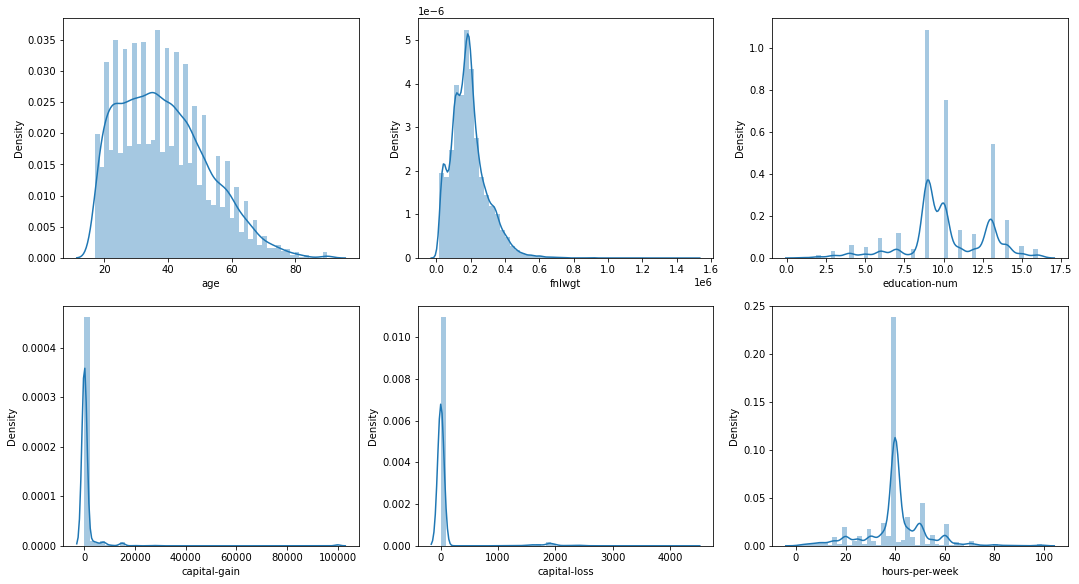

In [42]:
# Numerical Feature Analysis
# Distplot
plt.figure(figsize=(18,15))
plotnumber = 1
for col, value in df_num_cols.items():
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(value)
    plotnumber+=1
plt.show()

In [43]:
# Categoical Feature analysis

df_cat_cols = df[cat_cols]

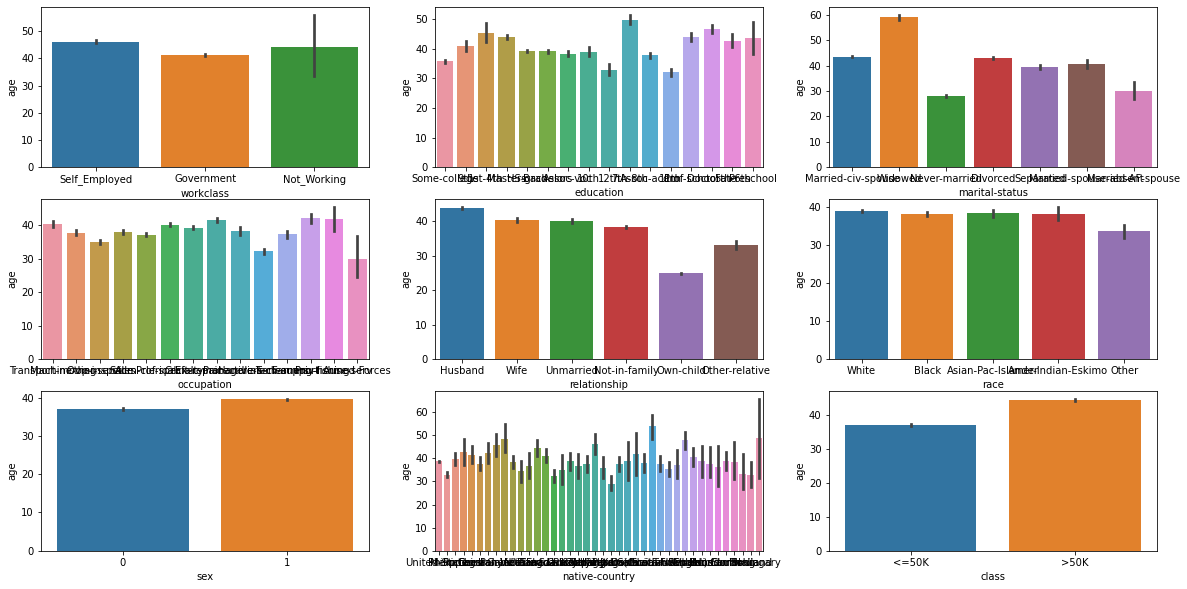

In [44]:
# Barplot

plt.figure(figsize=(20,10))
plotnumber = 1
for col,value in df_cat_cols.items():
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.barplot(y = df['age'],x = df[col])
    plotnumber+=1
plt.show()

In [45]:
# Statistical analysis
df.describe()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week
count,19986.000000,1.998600e+04,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000
mean,38.709747,1.895214e+05,10.080706,0.667817,1071.259982,88.298909,40.350145
std,13.744138,1.049564e+05,2.561418,0.471008,7341.497375,405.710602,12.355763
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173138e+05,9.000000,0.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784035e+05,10.000000,1.000000,0.000000,0.000000,40.000000
75%,48.000000,2.385800e+05,12.000000,1.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,1.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

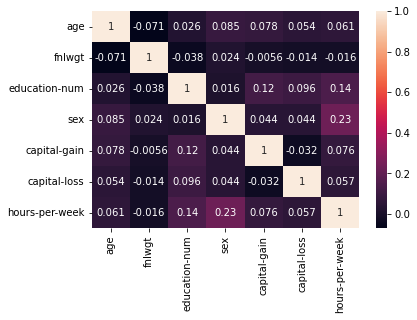

In [46]:
sns.heatmap(data=df.corr(),annot=True)

### Encoding

In [47]:
# Frequency Encoding
df.nunique()

age                  72
workclass             3
fnlwgt            15122
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        117
capital-loss         88
hours-per-week       88
native-country       40
class                 2
dtype: int64

In [48]:
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'class']

In [49]:
columns_with_nan = ['workclass','occupation','native-country']
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [50]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

In [51]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

### Feature Selection

In [52]:
X = df.drop('class',axis=1)
Y = df['class']

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [54]:
selector.fit(X,Y)

ExtraTreesClassifier(random_state=42)

In [55]:
feature_imp = selector.feature_importances_

In [56]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100),2))

0 16.61
1 1.12
2 17.36
3 4.12
4 8.52
5 7.41
6 8.11
7 8.92
8 1.55
9 2.93
10 8.93
11 2.81
12 9.98
13 1.61


In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19986 entries, 10766 to 16294
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             19986 non-null  int64
 1   workclass       19986 non-null  int32
 2   fnlwgt          19986 non-null  int64
 3   education       19986 non-null  int32
 4   education-num   19986 non-null  int64
 5   marital-status  19986 non-null  int32
 6   occupation      19986 non-null  int32
 7   relationship    19986 non-null  int32
 8   race            19986 non-null  int32
 9   sex             19986 non-null  int64
 10  capital-gain    19986 non-null  int64
 11  capital-loss    19986 non-null  int64
 12  hours-per-week  19986 non-null  int64
 13  native-country  19986 non-null  int32
dtypes: int32(7), int64(7)
memory usage: 2.3 MB


In [58]:
# dropping the less important feature

In [59]:
X = X.drop(['workclass','education','native-country','capital-loss','sex',
           'race'],axis=1)

### Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1,1))

### Handling Imbalaced dataset

In [62]:
round((Y.value_counts(normalize=True))*100,2).astype('str')+' %'

0    76.03 %
1    23.97 %
Name: class, dtype: object

In [63]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [64]:
ros.fit(X,Y)

RandomOverSampler(random_state=42)

In [65]:
X_resampled, Y_resampled = ros.fit_resample(X,Y)

In [66]:
round(Y_resampled.value_counts(normalize=True)*100,2).astype('str')+' %'

0    50.0 %
1    50.0 %
Name: class, dtype: object

### Creating a train test split

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

## Data modelling

### Model-1 Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [69]:
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [70]:
y_pred_log_reg = log_reg.predict(X_test)

### Model-2 KNN Classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [72]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [73]:
y_pred_knn = knn.predict(X_test)

### Model-3 Naive Bayes Classifier

In [74]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [75]:
nb.fit(X_train,y_train)

GaussianNB()

In [76]:
y_pred_nb = nb.predict(X_test)

### Model-4 Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [78]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [79]:
y_pred_dec_tree = dec_tree.predict(X_test)

### Model-5 Random Forest Classifier


In [80]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(random_state=42)

In [81]:
random.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
y_pred_ran_for = random.predict(X_test)

### Model-6 XGB Classifier 



In [83]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [84]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [85]:
y_pred_xgb = xgb.predict(X_test)

# Model Evaluation



In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [87]:
print("Logistic Regression : ")
print("Accuracy score : ",round(accuracy_score(y_test, y_pred_log_reg)*100,2))
print('F1 score:', round(f1_score(y_test, y_pred_log_reg)*100,2))

Logistic Regression : 
Accuracy score :  75.14
F1 score: 75.0


In [88]:
print("KNN Classifier : ")
print("Accuracy score : ",round(accuracy_score(y_test, y_pred_knn)*100,2))
print('F1 score:', round(f1_score(y_test, y_pred_knn)*100,2))

KNN Classifier : 
Accuracy score :  83.43
F1 score: 84.39


In [89]:
"""
print("Support Vector Classifier : ")
print("Accuracy score : ",round(accuracy_score(y_test, y_pred_svc)*100,2))
print('F1 score:', round(f1_score(y_test, y_pred_svc)*100,2))
"""

'\nprint("Support Vector Classifier : ")\nprint("Accuracy score : ",round(accuracy_score(y_test, y_pred_svc)*100,2))\nprint(\'F1 score:\', round(f1_score(y_test, y_pred_svc)*100,2))\n'

In [90]:
print("Naive Bayes Classifier : ")
print("Accuracy score : ",round(accuracy_score(y_test, y_pred_nb)*100,2))
print('F1 score:', round(f1_score(y_test, y_pred_nb)*100,2))

Naive Bayes Classifier : 
Accuracy score :  64.71
F1 score: 48.08


In [91]:
print("Decision Tree Classifier : ")
print("Accuracy score : ",round(accuracy_score(y_test, y_pred_dec_tree)*100,2))
print('F1 score:', round(f1_score(y_test, y_pred_dec_tree)*100,2))

Decision Tree Classifier : 
Accuracy score :  90.85
F1 score: 91.3


In [92]:
print("Random Forest Classifier : ")
print("Accuracy score : ",round(accuracy_score(y_test, y_pred_ran_for)*100,2))
print('F1 score:', round(f1_score(y_test, y_pred_ran_for)*100,2))

Random Forest Classifier : 
Accuracy score :  92.25
F1 score: 92.58


In [93]:
print("XGB Classifier : ")
print("Accuracy score : ",round(accuracy_score(y_test, y_pred_xgb)*100,2))
print('F1 score:', round(f1_score(y_test, y_pred_xgb)*100,2))

XGB Classifier : 
Accuracy score :  86.87
F1 score: 87.4


# Hyperparmeter Tunning


In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [95]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=100,num=15)]
max_depth = [int(x) for x in np.linspace(40,100,num=15)]

In [96]:
param_list = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [97]:
random_for_tunned = RandomizedSearchCV(estimator=random, param_distributions=param_list, 
                                      cv=5, random_state=42)

In [98]:
random_for_tunned.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 44, 48, 52, 57, 61,
                                                      65, 70, 74, 78, 82, 87,
                                                      91, 95, 100],
                                        'n_estimators': [40, 44, 48, 52, 57, 61,
                                                         65, 70, 74, 78, 82, 87,
                                                         91, 95, 100]},
                   random_state=42)

In [99]:
y_pred_rf_tunned = random_for_tunned.predict(X_test)

In [100]:
print("Random Forest Classifier : ")
print("Accuracy score : ",round(accuracy_score(y_test, y_pred_rf_tunned)*100,2))
print('F1 score:', round(f1_score(y_test, y_pred_rf_tunned)*100,2))

Random Forest Classifier : 
Accuracy score :  92.37
F1 score: 92.68


In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf_tunned)

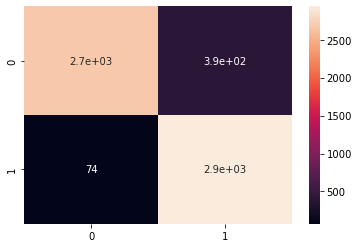

In [102]:
# We can also get the heatmap of the confusion matrix
sns.heatmap(cm,annot=True)
plt.show()

In [103]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred_rf_tunned)

In [104]:
class_report

'              precision    recall  f1-score   support\n\n           0       0.97      0.87      0.92      3066\n           1       0.88      0.98      0.93      3013\n\n    accuracy                           0.92      6079\n   macro avg       0.93      0.92      0.92      6079\nweighted avg       0.93      0.92      0.92      6079\n'

## Conclusion